<a href="https://colab.research.google.com/github/ashishpatel26/Imarticus_Python/blob/main/HaberMan_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

--2021-04-11 06:15:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1368 (1.3K) [application/x-httpd-php]
Saving to: ‘haberman.names.1’

haberman.names.1    100%[===================>]   1.34K  --.-KB/s    in 0s      

2021-04-11 06:15:33 (38.1 MB/s) - ‘haberman.names.1’ saved [1368/1368]



In [5]:
names = ["Age","Year of Operation","Num_Pos_aux_nodes","Survival Status"]
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", names = names)
data

,Age,Year of Operation,Num_Pos_aux_nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [6]:
data.dtypes

Age                  int64
Year of Operation    int64
Num_Pos_aux_nodes    int64
Survival Status      int64
dtype: object

In [7]:
from scipy.stats import chi2_contingency

In [8]:
contigency= pd.crosstab(data['Num_Pos_aux_nodes'], data['Survival Status'], normalize='index')
contigency

Survival Status,1,2
Num_Pos_aux_nodes,,
0,0.860294,0.139706
1,0.804878,0.195122
2,0.750000,0.250000
3,0.650000,0.350000
4,0.769231,0.230769
5,0.333333,0.666667
6,0.571429,0.428571
7,0.714286,0.285714
8,0.714286,0.285714


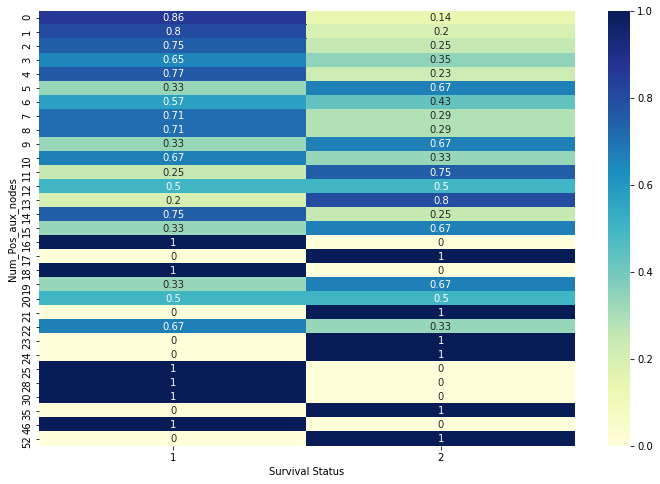

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [10]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.9876625315685115

In [12]:
y = data.pop('Survival Status')
X = data

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(244, 3)
(62, 3)
(244,)
(62,)


In [17]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
print("F Score(Logistic Regression) : ", f1_score(y_test, y_pred))

F Score(Logistic Regression) :  0.8080808080808082


In [18]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.91      0.81        44
           2       0.43      0.17      0.24        18

    accuracy                           0.69        62
   macro avg       0.58      0.54      0.52        62
weighted avg       0.64      0.69      0.64        62



![](https://miro.medium.com/max/1594/1*CPnO_bcdbE8FXTejQiV2dg.png)

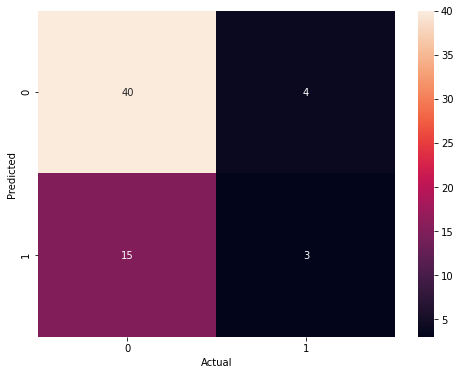

In [34]:
#@title Default title text
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [36]:
40/(40+15)

0.7272727272727273